In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
import matplotlib.colors as cl
import matplotlib.ticker as ticker
from mpl_toolkits.basemap import Basemap
from scipy import ndimage as im
from scipy import spatial
import seaborn as sns
import pandas as pd
from terminaltables import AsciiTable

In [2]:
def setup_map(plt_topo=True,hide_grid=False):
        ''' set the map, with etopo optionally '''
        # background
        bmap = Basemap(projection='cyl',llcrnrlat=18,urcrnrlat=51,\
                                         llcrnrlon=219,urcrnrlon=251,resolution='l')
        parallels = np.arange(20.,60.,10.)
        meridians = np.arange(220.,260.,10.)
        if hide_grid:
                bmap.drawparallels(parallels,labels=[True,False,False,True],linewidth=1,color=[1.,1.,1.])
                bmap.drawmeridians(meridians,labels=[True,False,False,True],linewidth=1,color=[1.,1.,1.])
        else:
                bmap.drawparallels(parallels,labels=[True,False,False,True],linewidth=1,color=[0.6,0.6,0.6],fontsize=20)
                bmap.drawmeridians(meridians,labels=[True,False,False,True],linewidth=1,color=[0.6,0.6,0.6],fontsize=20)
        bmap.drawcoastlines()
        if plt_topo:
                paltopo = cm.binary
                lon_topo = readnc(datadir + 'etopo_ccs.nc','topo_lon') + 360.
                lat_topo = readnc(datadir + 'etopo_ccs.nc','topo_lat')
                lon_topo2, lat_topo2 = np.meshgrid(lon_topo,lat_topo)
                topo = readnc(datadir + 'etopo_ccs.nc','topo')
                topomin=0 ; topomax=4000
                topo = np.ma.masked_less_equal(topo,0.)
                normtopo = cl.Normalize(vmin=topomin, vmax=topomax)
                xtopo,ytopo = bmap(lon_topo2,lat_topo2)
                T = bmap.contourf(xtopo,ytopo,topo,100,cmap=paltopo,norm=normtopo)
        return bmap

In [3]:
%matplotlib inline

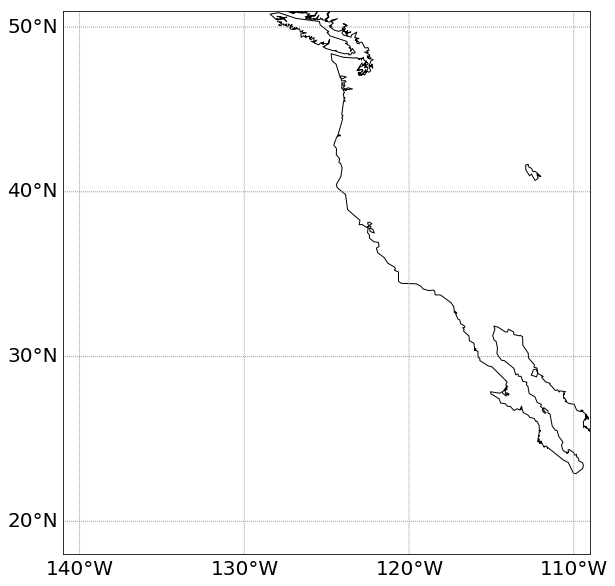

In [5]:
fig = plt.figure(figsize=[20.,10.])
m = setup_map(plt_topo=False,hide_grid=False)